# EDA

## Importing the libraries

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

In [2]:
! pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00:00:01


## Dataframes

In [3]:
airline_scrapped_review_clean_df = pd.read_csv('/kaggle/input/airline-scrapped-review-cleaned/AirlineScrappedReview_Cleaned.csv')

In [4]:
airline_scrapped_review_clean_df.columns = airline_scrapped_review_clean_df.columns.str.lower()

In [5]:
airline_scrapped_review_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passanger_name   3574 non-null   object 
 1   flying_date      955 non-null    object 
 2   route            2809 non-null   object 
 3   rating           3575 non-null   int64  
 4   verified         3575 non-null   object 
 5   review_title     3575 non-null   object 
 6   review_content   3575 non-null   object 
 7   traveller_type   3575 non-null   object 
 8   class            3575 non-null   object 
 9   start_location   2809 non-null   object 
 10  end_location     2809 non-null   object 
 11  layover_route    484 non-null    object 
 12  start_latitude   3515 non-null   float64
 13  start_longitude  3515 non-null   float64
 14  start_address    3515 non-null   object 
 15  end_latitude     3476 non-null   float64
 16  end_longitude    3476 non-null   float64
 17  end_address   

In [6]:
airline_scrapped_review_clean_df.describe()

,rating,start_latitude,start_longitude,end_latitude,end_longitude
count,3575.000000,3515.000000,3515.000000,3476.000000,3476.000000
mean,4.790490,42.639473,-2.164986,40.550399,-1.118816
std,3.170323,17.022014,44.576587,18.723619,46.045735
min,1.000000,-37.666951,-123.182909,-37.814245,-123.179234
25%,2.000000,41.893320,-0.458780,39.739236,-0.458780
50%,4.000000,46.314475,-0.127765,46.314475,-0.127765
75%,8.000000,51.467739,11.048029,51.467739,11.048029
max,10.000000,65.011873,151.208285,64.145981,174.550610


In [7]:
airline_scrapped_review_clean_df.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,passanger_name,flying_date,route,rating,verified,review_title,review_content,traveller_type,class,start_location,end_location,layover_route,start_latitude,start_longitude,start_address,end_latitude,end_longitude,end_address
1906,Leonard Miron,NaN,LHR to OTP,2,Not Verified,to fly to disappoint,London Heathrow to Bucharest with British Airw...,Business,Business Class,London Heathrow,Bucharest - Henri Coandă International Airport,NaN,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",NaN,NaN,NaN
2464,Jim Dennis,September 2015,London to Tampa,1,Not Verified,awful customer service,Awful customer service. My wife and I have flo...,Couple Leisure,Business Class,London,Tampa,NaN,51.507446,-0.127765,"London, Greater London, England, United Kingdom",27.947760,-82.458444,"Tampa, Hillsborough County, Florida, United St..."
1492,Greg Penola,NaN,Istanbul to London,3,Not Verified,like a low cost carrier,Verified Review Istanbul to London on a reas...,Family Leisure,Economy Class,Istanbul,London,NaN,41.076602,29.052495,"İstanbul, Marmara Bölgesi, Türkiye",51.507446,-0.127765,"London, Greater London, England, United Kingdom"
1259,William Beard,NaN,Miami to London Heathrow,3,Trip Verified,poor quality product crew have to support,Miami to London Heathrow. A bit of a mixed bag...,Couple Leisure,Economy Class,Miami,London Heathrow,NaN,25.774173,-80.193620,"Miami, Miami-Dade County, Florida, United States",51.467739,-0.458780,"London Heathrow Airport, Northern Perimeter Ro..."
2050,Ben Thain,NaN,DOH to CDG via BAH / LHR,8,Not Verified,not direct but it was well worth it.,Verified Review Doha to Paris CDG via Bahrai...,Business,Premium Economy,Doha - Doha International Airport,Paris - Charles de Gaulle,BAH / LHR,25.257551,51.571999,"مطار الدوحة الدولي, حديقة المطار, مطار الدوحة ...",48.867491,2.313601,"Charles de Gaulle, Place Clemenceau, Quartier ..."


In [8]:
print(airline_scrapped_review_clean_df.shape)
print(airline_scrapped_review_clean_df.columns)
print(airline_scrapped_review_clean_df.head())

(3575, 18)
Index(['passanger_name', 'flying_date', 'route', 'rating', 'verified',
       'review_title', 'review_content', 'traveller_type', 'class',
       'start_location', 'end_location', 'layover_route', 'start_latitude',
       'start_longitude', 'start_address', 'end_latitude', 'end_longitude',
       'end_address'],
      dtype='object')
  passanger_name flying_date                  route  rating       verified  \
0     Paige Boet   June 2023  New Orleans to London       1  Trip Verified   
1        S Layne  March 2023        London to Amman       1  Trip Verified   
2    E Lanewoski         NaN     Heathrow to Bodrum       2  Trip Verified   
3    Joel Burman   June 2023        Amman to London       4   Not Verified   
4        R Vines         NaN   London City to Ibiza       7  Trip Verified   

                             review_title  \
0             The airline lost my luggage   
1  fully refunded by our travel insurance   
2             no boarding drinks provided   
3   

passanger_name        1
flying_date        2620
route               766
rating                0
verified              0
review_title          0
review_content        0
traveller_type        0
class                 0
start_location      766
end_location        766
layover_route      3091
start_latitude       60
start_longitude      60
start_address        60
end_latitude         99
end_longitude        99
end_address          99
dtype: int64


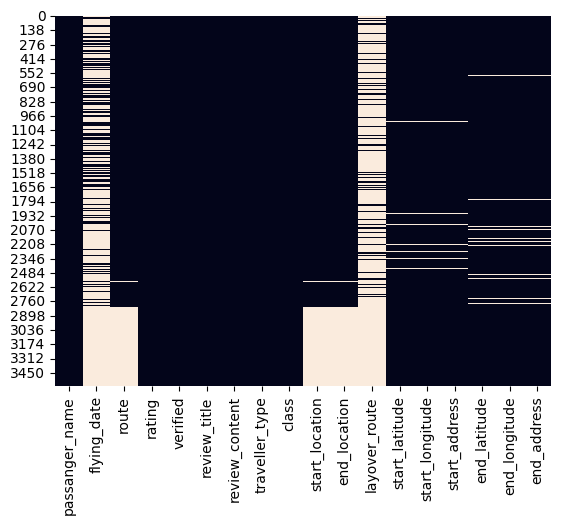

In [9]:
print(airline_scrapped_review_clean_df.isnull().sum())
sns.heatmap(airline_scrapped_review_clean_df.isnull(), cbar=False); plt.show()


In [10]:
print(airline_scrapped_review_clean_df.info())
print(airline_scrapped_review_clean_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passanger_name   3574 non-null   object 
 1   flying_date      955 non-null    object 
 2   route            2809 non-null   object 
 3   rating           3575 non-null   int64  
 4   verified         3575 non-null   object 
 5   review_title     3575 non-null   object 
 6   review_content   3575 non-null   object 
 7   traveller_type   3575 non-null   object 
 8   class            3575 non-null   object 
 9   start_location   2809 non-null   object 
 10  end_location     2809 non-null   object 
 11  layover_route    484 non-null    object 
 12  start_latitude   3515 non-null   float64
 13  start_longitude  3515 non-null   float64
 14  start_address    3515 non-null   object 
 15  end_latitude     3476 non-null   float64
 16  end_longitude    3476 non-null   float64
 17  end_address   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [15]:
for col in ['verified', 'traveller_type', 'class']:
    print(f"{col}: {airline_scrapped_review_clean_df[col].unique()} | Counts: {airline_scrapped_review_clean_df[col].value_counts()}")


verified: ['Trip Verified' 'Not Verified'] | Counts: verified
Not Verified     2508
Trip Verified    1067
Name: count, dtype: int64
traveller_type: ['Solo Leisure' 'Couple Leisure' 'Family Leisure' 'Business' 'Unknown'
 'Various'] | Counts: traveller_type
Couple Leisure    949
Solo Leisure      860
Unknown           760
Business          623
Family Leisure    382
Various             1
Name: count, dtype: int64
class: ['Economy Class' 'Business Class' 'Premium Economy' 'First Class'
 'Unknown'] | Counts: class
Economy Class      1846
Business Class     1160
Premium Economy     358
First Class         209
Unknown               2
Name: count, dtype: int64


count    3575.000000
mean        4.790490
std         3.170323
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: rating, dtype: float64


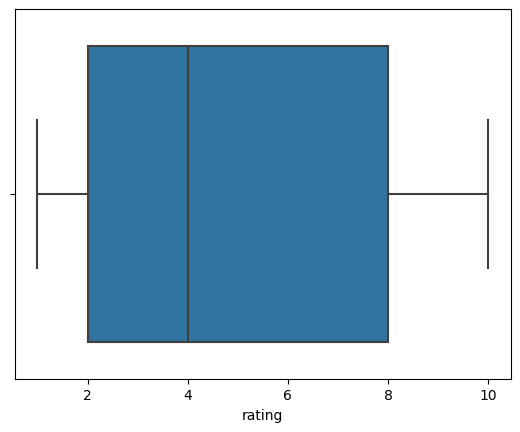

In [16]:
print(airline_scrapped_review_clean_df['rating'].describe())
sns.boxplot(x=airline_scrapped_review_clean_df['rating']); plt.show()


In [17]:
print(airline_scrapped_review_clean_df.duplicated().sum())
print(airline_scrapped_review_clean_df['passanger_name'].isnull().sum())


74
1


In [18]:
numeric_df = airline_scrapped_review_clean_df.select_dtypes(include=['float64', 'int64'])
print(numeric_df.corr())


                   rating  start_latitude  start_longitude  end_latitude  \
rating           1.000000        0.053158         0.038163     -0.009968   
start_latitude   0.053158        1.000000        -0.201806     -0.127849   
start_longitude  0.038163       -0.201806         1.000000     -0.050639   
end_latitude    -0.009968       -0.127849        -0.050639      1.000000   
end_longitude    0.010533       -0.049311        -0.001746     -0.215104   
sentiment_score  0.675534        0.040186         0.021016     -0.005608   

                 end_longitude  sentiment_score  
rating                0.010533         0.675534  
start_latitude       -0.049311         0.040186  
start_longitude      -0.001746         0.021016  
end_latitude         -0.215104        -0.005608  
end_longitude         1.000000         0.008684  
sentiment_score       0.008684         1.000000  


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

combined_text = airline_scrapped_review_clean_df['review_title'] + ' ' + airline_scrapped_review_clean_df['review_content']

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return None

airline_scrapped_review_clean_df['sentiment_score'] = airline_scrapped_review_clean_df['review_content'].apply(get_sentiment)

print(airline_scrapped_review_clean_df[['review_content', 'sentiment_score']].head())

                                      review_content  sentiment_score
0  The airline lost my luggage and was absolutely...          -0.7990
1  We booked on the BA website, round trip flight...           0.0219
2  First time flying with BA business class, neve...          -0.7096
3  You can buy sandwiches and crisps but don't ex...          -0.5849
4  This is a two-for-one review covering economy ...           0.9789


# Cleaning Airline-scrapped file

<Axes: >

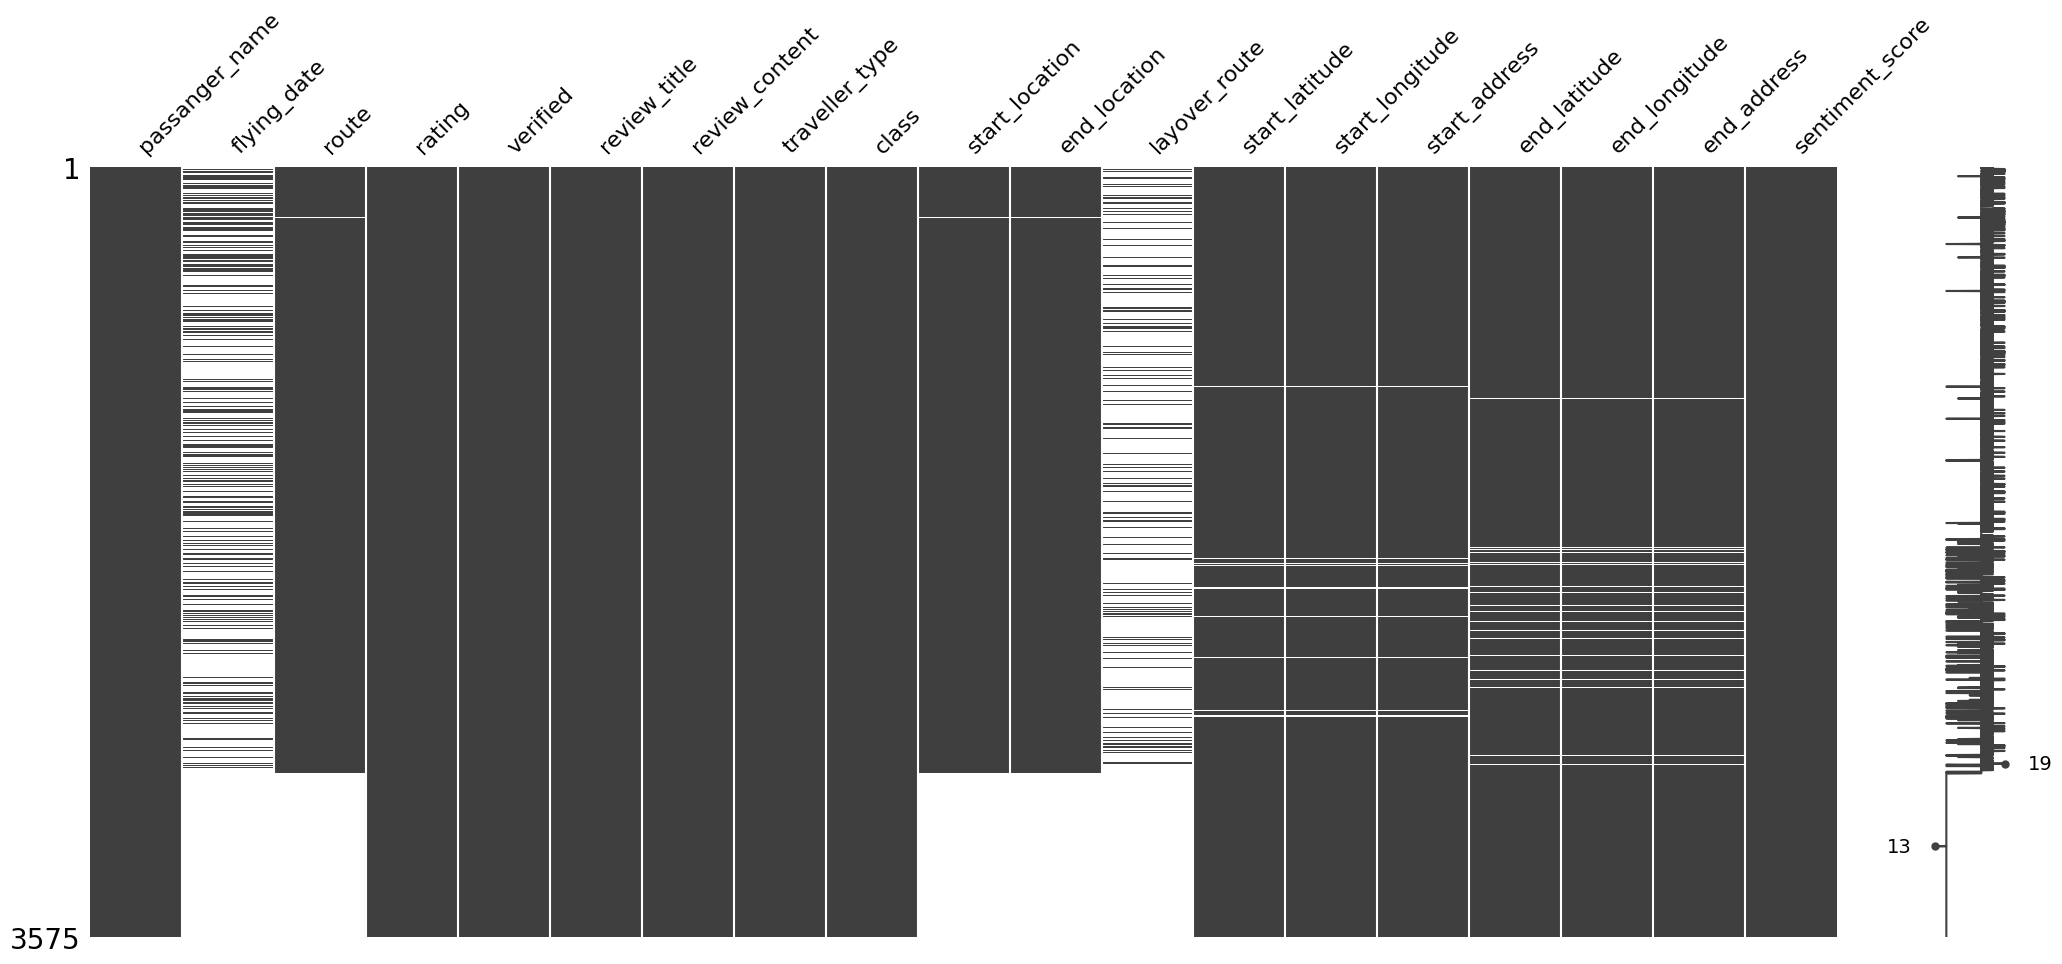

In [21]:
msno.matrix(airline_scrapped_review_clean_df)

## Filling the start_location and end_location missing values Strategy

In [27]:
# Analyze the relationship between missing locations and available coordinates
print("ANALYSIS OF MISSING LOCATIONS VS AVAILABLE COORDINATES")
print("="*60)

# Check records where start_location is missing but coordinates are available
start_missing_coords_available = airline_scrapped_review_clean_df[(airline_scrapped_review_clean_df['start_location'].isnull()) & 
                                   (airline_scrapped_review_clean_df['start_latitude'].notnull()) & 
                                   (airline_scrapped_review_clean_df['start_longitude'].notnull())]
print(f"Records with missing start_location but available coordinates: {len(start_missing_coords_available)}")

# Check records where end_location is missing but coordinates are available  
end_missing_coords_available = airline_scrapped_review_clean_df[(airline_scrapped_review_clean_df['end_location'].isnull()) & 
                                 (airline_scrapped_review_clean_df['end_latitude'].notnull()) & 
                                 (airline_scrapped_review_clean_df['end_longitude'].notnull())]
print(f"Records with missing end_location but available coordinates: {len(end_missing_coords_available)}")

# Show some examples
print("\nSample records with missing start_location but available coordinates:")
print(start_missing_coords_available[['start_location', 'start_latitude', 'start_longitude', 'start_address']].head())

print("\nSample records with missing end_location but available coordinates:")
print(end_missing_coords_available[['end_location', 'end_latitude', 'end_longitude', 'end_address']].head())

ANALYSIS OF MISSING LOCATIONS VS AVAILABLE COORDINATES
Records with missing start_location but available coordinates: 766
Records with missing end_location but available coordinates: 766

Sample records with missing start_location but available coordinates:
     start_location  start_latitude  start_longitude  \
42              NaN       46.314475        11.048029   
234             NaN       46.314475        11.048029   
419             NaN       46.314475        11.048029   
2552            NaN       46.314475        11.048029   
2567            NaN       46.314475        11.048029   

                                          start_address  
42    Nanno, Ville d'Anaunia, Comunità della Val di ...  
234   Nanno, Ville d'Anaunia, Comunità della Val di ...  
419   Nanno, Ville d'Anaunia, Comunità della Val di ...  
2552  Nanno, Ville d'Anaunia, Comunità della Val di ...  
2567  Nanno, Ville d'Anaunia, Comunità della Val di ...  

Sample records with missing end_location but available c

## coordinate to location mapping from existing data (lowercase cols + same df name)

In [29]:
def create_coordinate_location_mapping(airline_scrapped_review_clean_df):
    """Create mappings from coordinates to location names using existing data"""
    
    # For start locations
    start_mapping = {}
    start_valid = airline_scrapped_review_clean_df[
        (airline_scrapped_review_clean_df['start_location'].notnull()) &
        (airline_scrapped_review_clean_df['start_latitude'].notnull()) &
        (airline_scrapped_review_clean_df['start_longitude'].notnull())
    ]
    
    for _, row in start_valid.iterrows():
        coord_key = (round(row['start_latitude'], 6), round(row['start_longitude'], 6))
        if coord_key not in start_mapping:
            start_mapping[coord_key] = row['start_location']
    
    # For end locations
    end_mapping = {}
    end_valid = airline_scrapped_review_clean_df[
        (airline_scrapped_review_clean_df['end_location'].notnull()) &
        (airline_scrapped_review_clean_df['end_latitude'].notnull()) &
        (airline_scrapped_review_clean_df['end_longitude'].notnull())
    ]
    
    for _, row in end_valid.iterrows():
        coord_key = (round(row['end_latitude'], 6), round(row['end_longitude'], 6))
        if coord_key not in end_mapping:
            end_mapping[coord_key] = row['end_location']
    
    return start_mapping, end_mapping

# Create the mappings (using the same df variable name)
start_coord_mapping, end_coord_mapping = create_coordinate_location_mapping(airline_scrapped_review_clean_df)
print(f"Start coordinate mappings created: {len(start_coord_mapping)}")
print(f"End coordinate mappings created: {len(end_coord_mapping)}")

# Show some examples
print("\nSample start coordinate mappings:")
for i, (coord, location) in enumerate(list(start_coord_mapping.items())[:5]):
    print(f"  {coord} -> {location}")

print("\nSample end coordinate mappings:")
for i, (coord, location) in enumerate(list(end_coord_mapping.items())[:5]):
    print(f"  {coord} -> {location}")


Start coordinate mappings created: 281
End coordinate mappings created: 317

Sample start coordinate mappings:
  (29.975998, -90.078213) -> New Orleans
  (51.507446, -0.127765) -> London
  (51.467739, -0.45878) -> London Heathrow
  (31.951569, 35.923963) -> Amman
  (42.953765, -81.229153) -> London City

Sample end coordinate mappings:
  (51.507446, -0.127765) -> London
  (31.951569, 35.923963) -> Amman
  (37.034399, 27.430651) -> Bodrum
  (38.97439, 1.419746) -> Ibiza
  (38.895037, -77.036543) -> Washington


## Function to extract city name from address (observed pattern from dataset)

In [31]:
def extract_city_from_address(address):
    """Extract the main city name from a full address"""
    if pd.isna(address):
        return None
    
    # Split by comma and take the first part (usually the city)
    parts = str(address).split(',')
    if len(parts) > 0:
        city = parts[0].strip()
        
        # Clean up common prefixes/suffixes
        city = city.replace('City of ', '')
        city = city.replace('Municipality of ', '')
        city = city.replace('Gemeente ', '')
        
        # Handle airport names - extract city
        if 'Airport' in city:
            # Try to extract city name before 'Airport'
            airport_parts = city.split()
            if len(airport_parts) > 1:
                city = ' '.join([part for part in airport_parts if 'Airport' not in part])
        
        return city
    return None

# Test the function with some examples
test_addresses = [
    "Nanno, Ville d'Anaunia, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38093, Italia",
    "London Heathrow Airport, The Beacon Roundabout, London Borough of Hillingdon, London, Greater London, England, TW6 3JF, United Kingdom",
    "City of New York, New York, United States"
]

print("Testing address extraction:")
for addr in test_addresses:
    print(f"  '{addr[:50]}...' -> '{extract_city_from_address(addr)}'")

# Create a backup mapping using addresses for records with missing locations
print("\nExtracting locations from addresses for missing start_location...")
start_missing = airline_scrapped_review_clean_df[
    airline_scrapped_review_clean_df['start_location'].isnull() &
    airline_scrapped_review_clean_df['start_address'].notnull()
]
print(f"Records with missing start_location but available start_address: {len(start_missing)}")

print("\nExtracting locations from addresses for missing end_location...")
end_missing = airline_scrapped_review_clean_df[
    airline_scrapped_review_clean_df['end_location'].isnull() &
    airline_scrapped_review_clean_df['end_address'].notnull()
]
print(f"Records with missing end_location but available end_address: {len(end_missing)}")


Testing address extraction:
  'Nanno, Ville d'Anaunia, Comunità della Val di Non,...' -> 'Nanno'
  'London Heathrow Airport, The Beacon Roundabout, Lo...' -> 'London Heathrow'
  'City of New York, New York, United States...' -> 'New York'

Extracting locations from addresses for missing start_location...
Records with missing start_location but available start_address: 766

Extracting locations from addresses for missing end_location...
Records with missing end_location but available end_address: 766


## filling missing values in start_location and end_location

In [39]:
# Create a copy of the dataframe to work with
airline_scrapped_review_clean_filled = airline_scrapped_review_clean_df.copy()

# Function to fill missing locations using coordinates and addresses
def fill_missing_locations(df, coord_mapping, location_col, lat_col, lon_col, address_col):
    """Fill missing location values using coordinate mapping and address extraction"""
    filled_count = 0
    
    # Get indices where location is missing but coordinates are available
    missing_mask = (df[location_col].isnull()) & (df[lat_col].notnull()) & (df[lon_col].notnull())
    missing_indices = df[missing_mask].index
    
    for idx in missing_indices:
        # Try coordinate mapping first
        lat = round(df.loc[idx, lat_col], 6)
        lon = round(df.loc[idx, lon_col], 6)
        coord_key = (lat, lon)
        
        if coord_key in coord_mapping:
            df.loc[idx, location_col] = coord_mapping[coord_key]
            filled_count += 1
        else:
            # Fall back to address extraction
            address = df.loc[idx, address_col]
            if pd.notna(address):
                extracted_location = extract_city_from_address(address)
                if extracted_location:
                    df.loc[idx, location_col] = extracted_location
                    filled_count += 1
    
    return filled_count

# Fill missing start_location values
print("filling missing start_location values...")
start_filled = fill_missing_locations(
    airline_scrapped_review_clean_filled,
    start_coord_mapping,
    'start_location',
    'start_latitude',
    'start_longitude',
    'start_address'
)
print(f"filled {start_filled} missing start_location values")

# Fill missing end_location values
print("filling missing end_location values...")
end_filled = fill_missing_locations(
    airline_scrapped_review_clean_filled,
    end_coord_mapping,
    'end_location',
    'end_latitude',
    'end_longitude',
    'end_address'
)
print(f"filled {end_filled} missing end_location values")

print(f"\nTotal location values filled: {start_filled + end_filled}")

# Check the results
print("\nMissing data summary after filling:")
print("start_location missing:", airline_scrapped_review_clean_filled['start_location'].isnull().sum())
print("end_location missing:", airline_scrapped_review_clean_filled['end_location'].isnull().sum())


filling missing start_location values...
filled 766 missing start_location values
filling missing end_location values...
filled 766 missing end_location values

Total location values filled: 1532

Missing data summary after filling:
start_location missing: 0
end_location missing: 0


<Axes: >

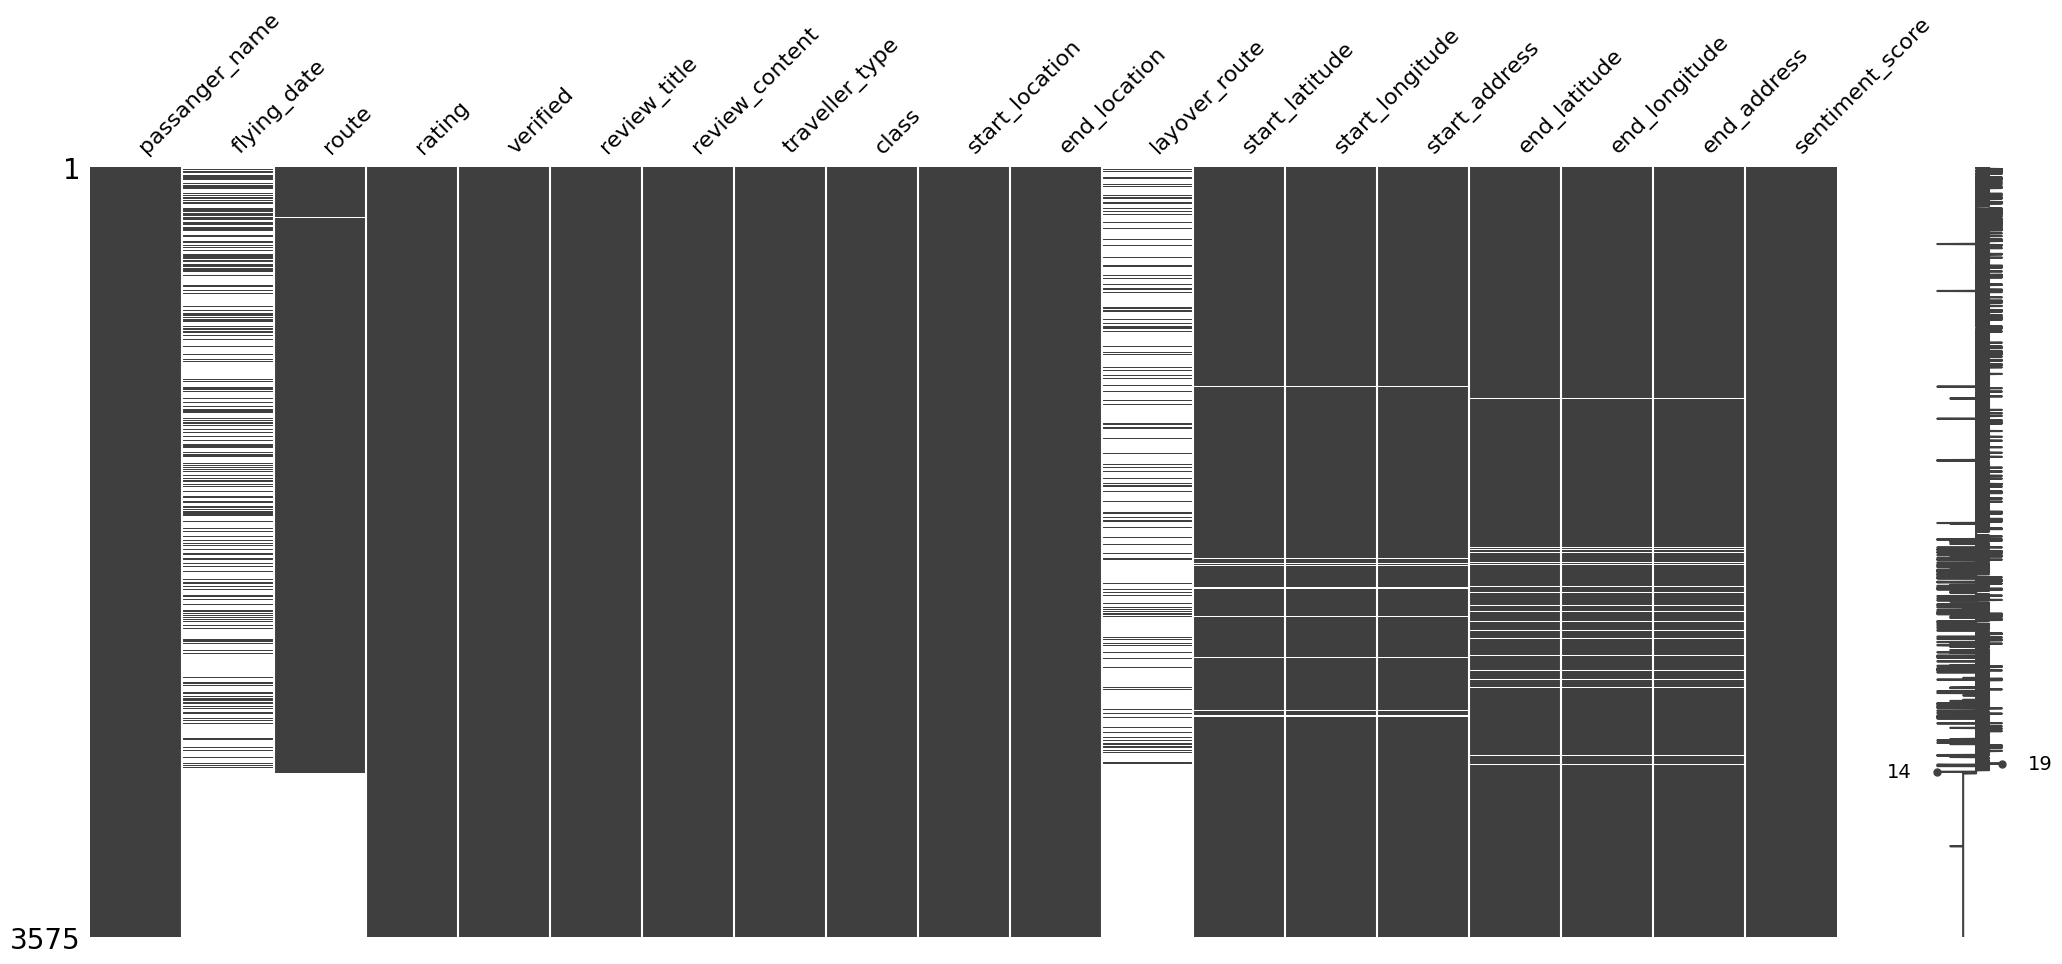

In [40]:
msno.matrix(airline_scrapped_review_clean_filled)

## dropping un needed columns

<Axes: >

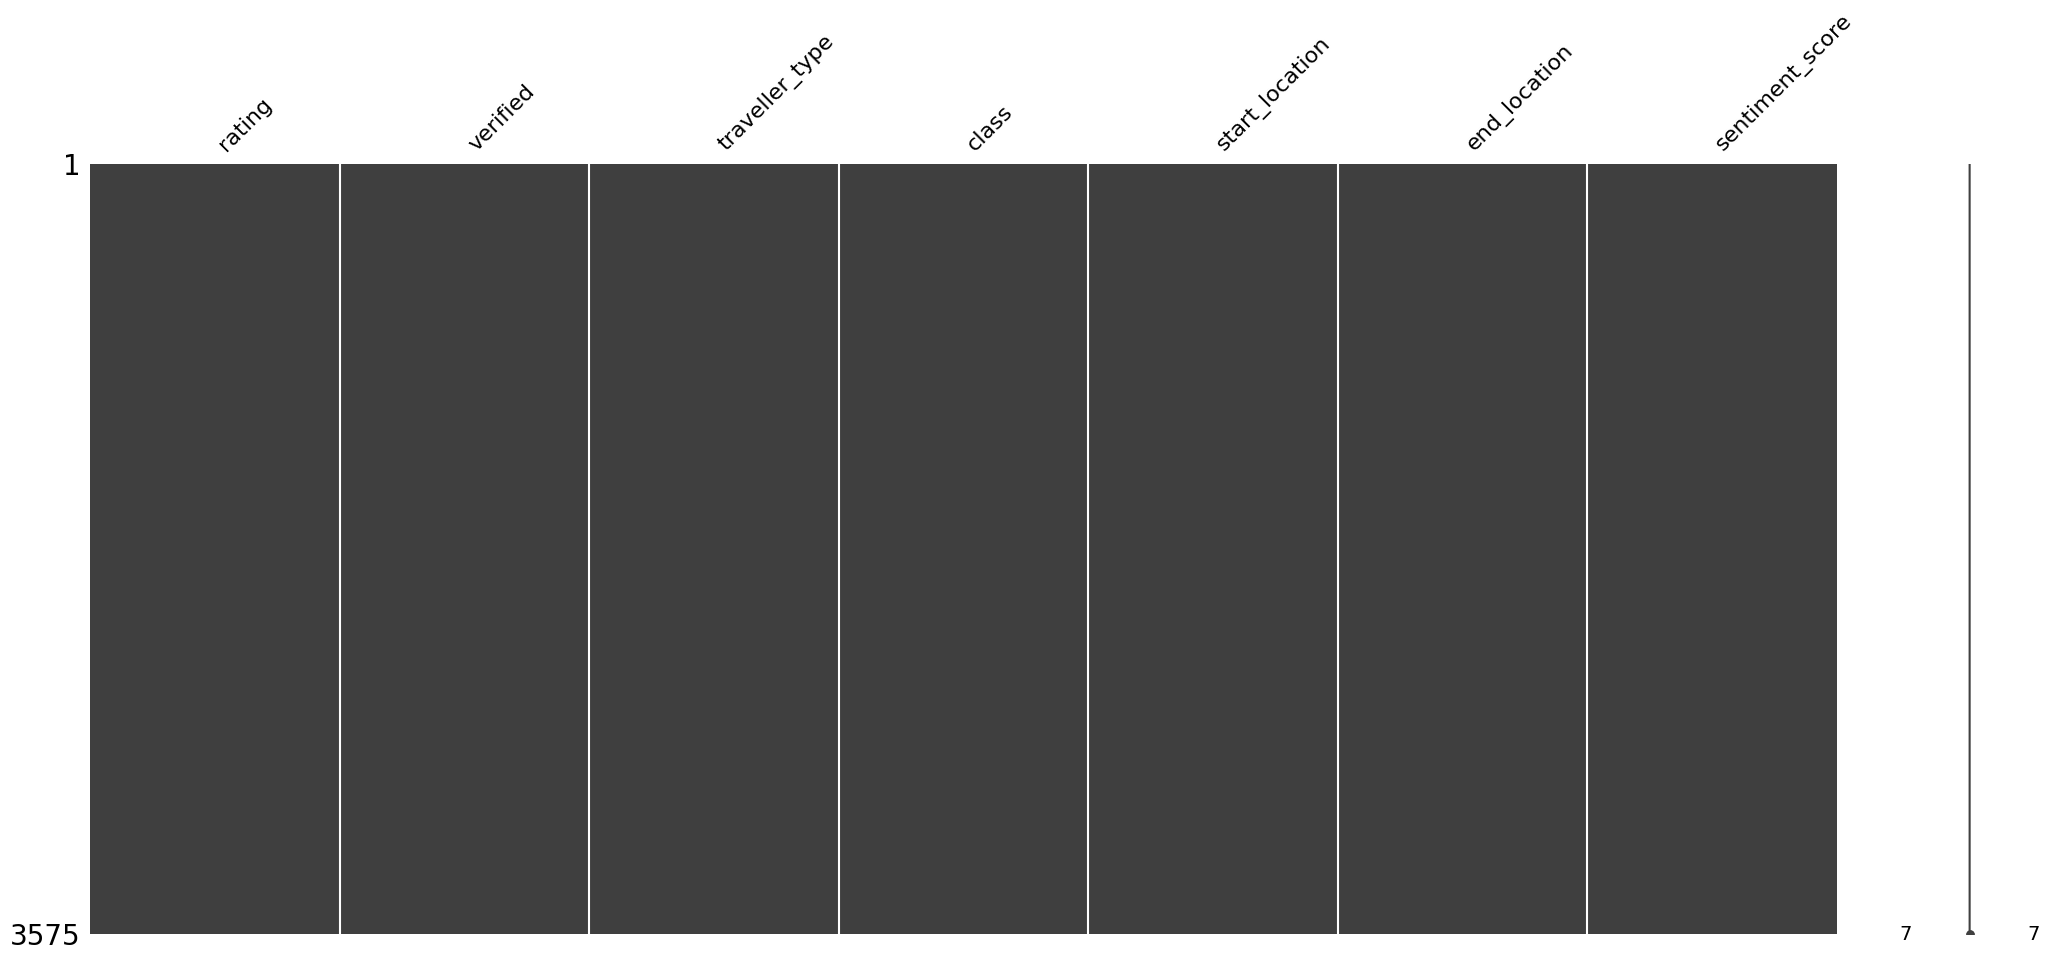

In [41]:
airline_scrapped_review_clean_filled.drop(
    columns=[
        "passanger_name",
        "flying_date",
        "route",
        "layover_route",
        "start_latitude",
        "start_longitude",
        "end_latitude",
        "end_longitude",
        "start_address",
        "end_address",
        "review_title",
        "review_content"
    ] ,
    inplace = True
)

msno.matrix(airline_scrapped_review_clean_filled)

In [42]:
airline_scrapped_review_clean_filled

,rating,verified,traveller_type,class,start_location,end_location,sentiment_score
0,1,Trip Verified,Solo Leisure,Economy Class,New Orleans,London,-0.7990
1,1,Trip Verified,Couple Leisure,Business Class,London,Amman,0.0219
2,2,Trip Verified,Solo Leisure,Business Class,London Heathrow,Bodrum,-0.7096
3,4,Not Verified,Solo Leisure,Economy Class,Amman,London,-0.5849
4,7,Trip Verified,Family Leisure,Business Class,London City,Ibiza,0.9789
...,...,...,...,...,...,...,...
3570,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,0.9129
3571,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,-0.8763
3572,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,-0.2003
3573,6,Not Verified,Unknown,Business Class,Nanno,Nanno,0.9864


## adding satisfaction labels

In [47]:
airline_scrapped_review_clean_filled["satisfaction"] = (airline_scrapped_review_clean_filled["rating"] >= 5).astype(int)

In [48]:
airline_scrapped_review_clean_filled

,rating,verified,traveller_type,class,start_location,end_location,sentiment_score,satisfaction
0,1,Trip Verified,Solo Leisure,Economy Class,New Orleans,London,-0.7990,0
1,1,Trip Verified,Couple Leisure,Business Class,London,Amman,0.0219,0
2,2,Trip Verified,Solo Leisure,Business Class,London Heathrow,Bodrum,-0.7096,0
3,4,Not Verified,Solo Leisure,Economy Class,Amman,London,-0.5849,0
4,7,Trip Verified,Family Leisure,Business Class,London City,Ibiza,0.9789,1
...,...,...,...,...,...,...,...,...
3570,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,0.9129,0
3571,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,-0.8763,0
3572,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,-0.2003,0
3573,6,Not Verified,Unknown,Business Class,Nanno,Nanno,0.9864,1


## adding routes

In [53]:
airline_scrapped_review_clean_filled["route"] = airline_scrapped_review_clean_filled["start_location"].astype(str) + " → " + airline_scrapped_review_clean_filled["end_location"].astype(str)

<Axes: >

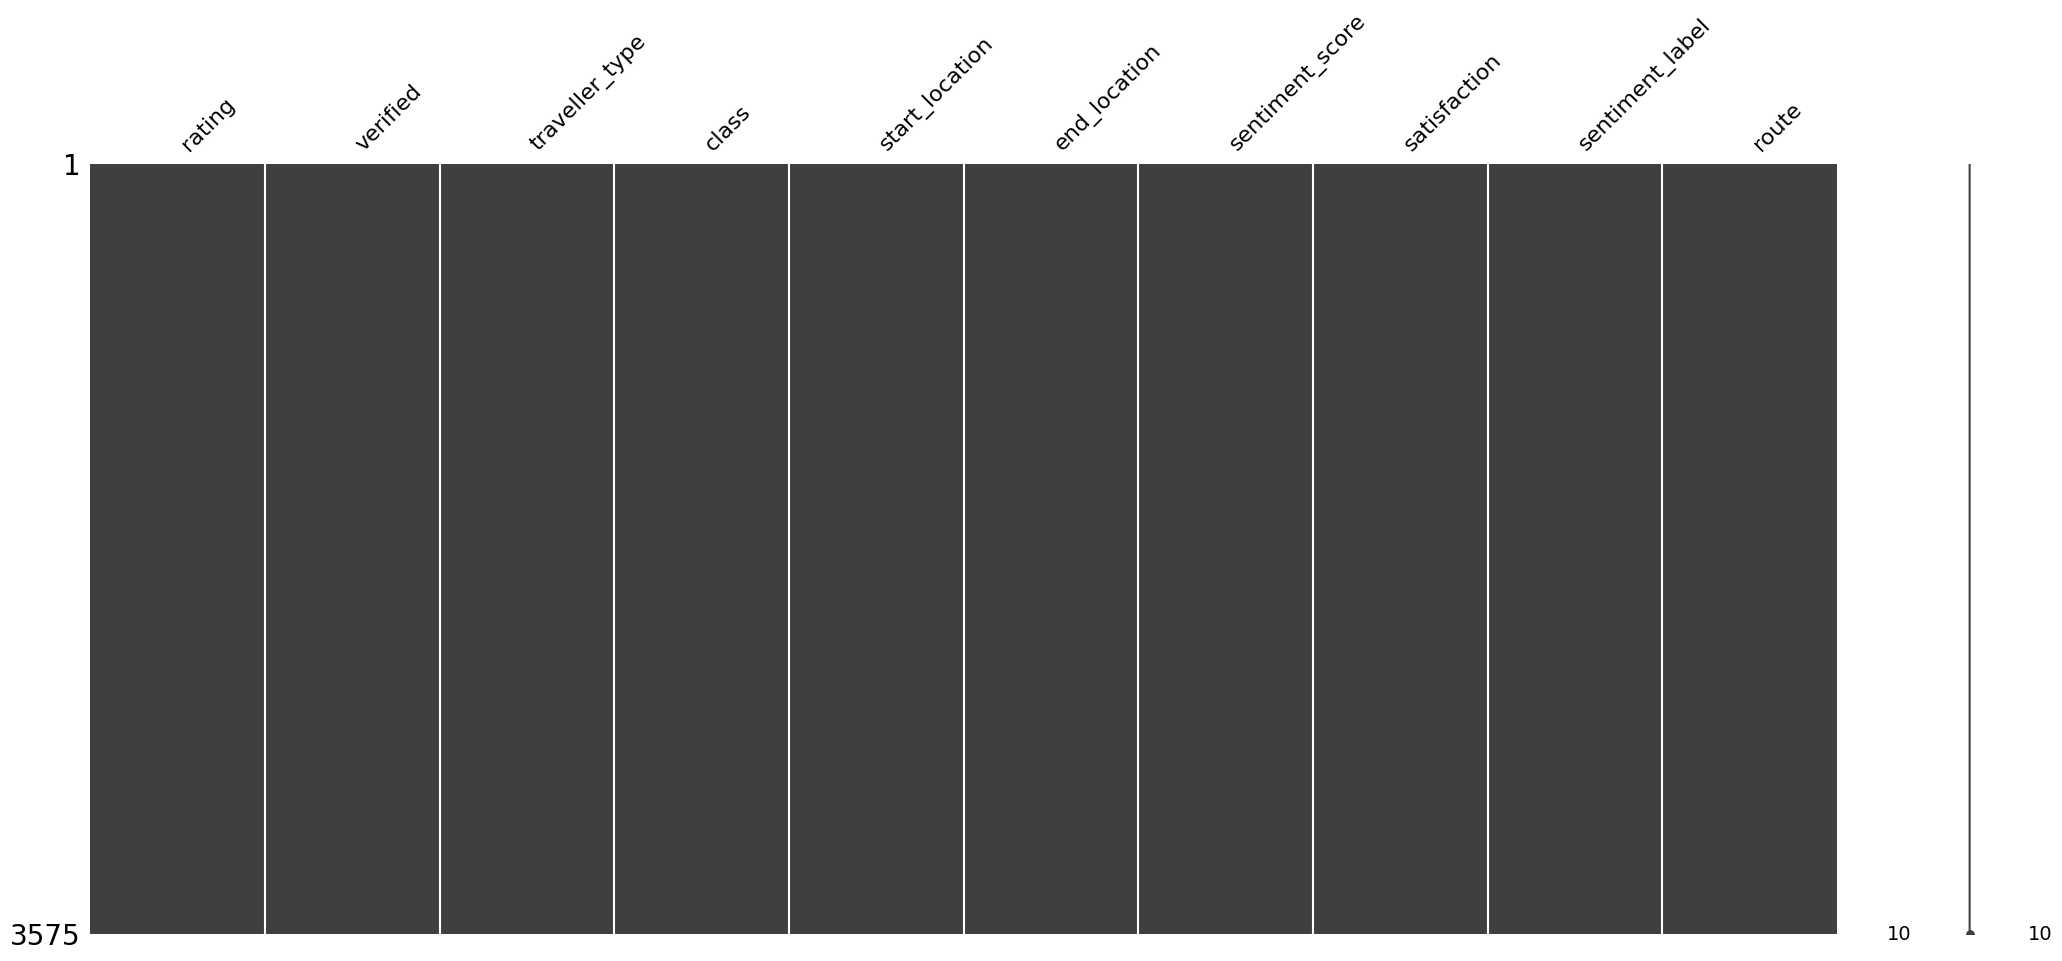

In [54]:
msno.matrix(airline_scrapped_review_clean_filled)

## just making sentiment scores readable

In [55]:
airline_scrapped_review_clean_filled["sentiment_label"] = airline_scrapped_review_clean_filled["sentiment_score"].map(
    lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral")
)

In [56]:
airline_scrapped_review_clean_filled

,rating,verified,traveller_type,class,start_location,end_location,sentiment_score,satisfaction,sentiment_label,route
0,1,Trip Verified,Solo Leisure,Economy Class,New Orleans,London,-0.7990,0,negative,New Orleans → London
1,1,Trip Verified,Couple Leisure,Business Class,London,Amman,0.0219,0,neutral,London → Amman
2,2,Trip Verified,Solo Leisure,Business Class,London Heathrow,Bodrum,-0.7096,0,negative,London Heathrow → Bodrum
3,4,Not Verified,Solo Leisure,Economy Class,Amman,London,-0.5849,0,negative,Amman → London
4,7,Trip Verified,Family Leisure,Business Class,London City,Ibiza,0.9789,1,positive,London City → Ibiza
...,...,...,...,...,...,...,...,...,...,...
3570,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,0.9129,0,positive,Nanno → Nanno
3571,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,-0.8763,0,negative,Nanno → Nanno
3572,4,Not Verified,Unknown,Economy Class,Nanno,Nanno,-0.2003,0,negative,Nanno → Nanno
3573,6,Not Verified,Unknown,Business Class,Nanno,Nanno,0.9864,1,positive,Nanno → Nanno


In [57]:
airline_scrapped_review_clean_filled['start_location'].unique()

array(['New Orleans', 'London', 'London Heathrow', 'Amman', 'London City',
       'Amsterdam', 'Marseille', 'Cairo', 'Bucharest', 'London Gatwick',
       'Dublin', 'Tokyo', 'San Francisco', 'Santiago', 'Seattle',
       'Singapore', 'Athens', 'Vancouver', 'Boston', 'Nice', 'Las Vegas',
       'Lisbon', 'Dallas', 'Los Angeles', 'Atlanta', 'Nanno', 'Sydney',
       'New York', 'Sweden', 'Bangalore', 'Brussels', 'Copenhagen',
       'Hong Kong', 'Santorini', 'Madrid', 'Faro', 'Belfast', 'Mumbai',
       'Mexico City', 'Barcelona', 'Marrakech', 'Miami', 'Johannesburg',
       'Munich', 'Zagreb', 'New York JFK', 'Geneva', 'Prague', 'Portland',
       'Lyon', 'Oslo', 'Islamabad', 'Edinburgh', 'Palma', 'Cape Town',
       'Istanbul', 'Vienna', 'Doha', 'Keflavik', 'Barbados', 'Glasgow',
       'Denver', 'Montreal', 'Amman Jordan', 'Dusseldorf', 'Milan',
       'Baltimore', 'Dubai', 'Larnaca', 'Orlando', 'Jersey', 'Gothenburg',
       'Manchester', 'Berlin', 'Tel Aviv', 'Dallas Ft Worth', 'Acc

In [64]:
    airline_scrapped_review_clean_filled["route"].nunique() 

1378